### Lab 3: Laplace Transform


### Question 1
Solve using Python for:
1. Laplace or iLaplace of followings
2. Initial value and final value $h(t0)$ and $h(\infty)$
3. Plot the pole and zero diagram and hence determine the system is stable

Examples of table of $h(t)$, where $a = 0.1, b = 0.2, k = 3, \omega_0 = 2, \phi = 0.1\pi$ are constants

1. $h(t) = e^{-at}cos(\omega_0t + \phi)*u(t)$
2. $h(t) = e^{-at}sin(\omega_0t + \phi)*u(t)$
3. $H(s) = \frac{ks}{(s+a)(s-b)}$
4. $h(t) = e^{+at}*u(t)$


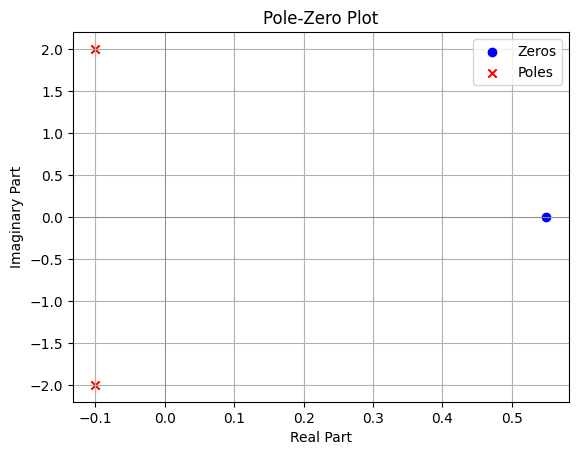

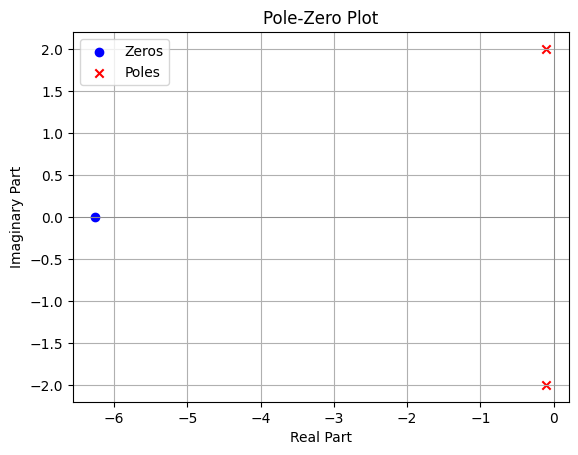

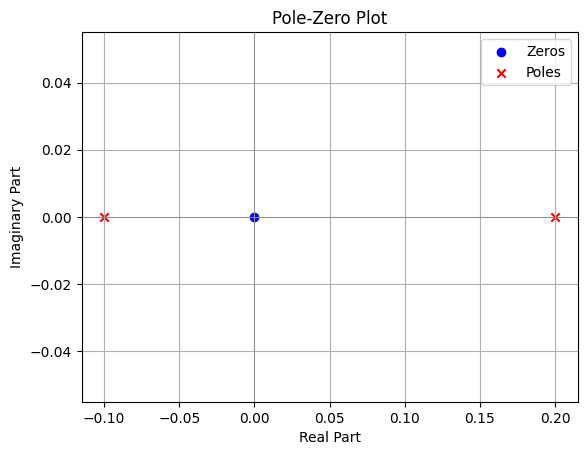

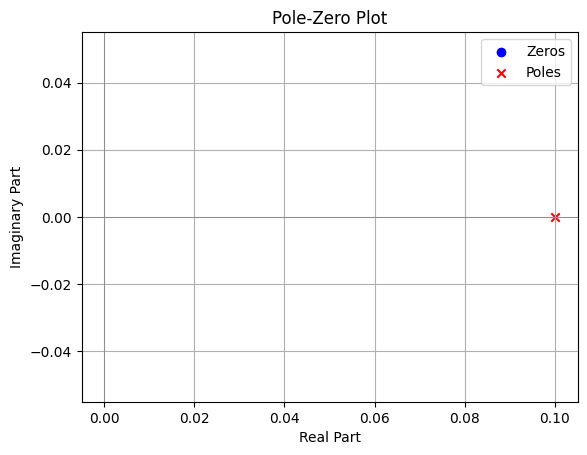

{'h1': {'Laplace': '\\frac{e^{- 0.1 i \\pi}}{2 \\left(s + 0.1 + 2.0 i\\right)} + \\frac{e^{0.1 i \\pi}}{2 \\left(s + 0.1 - 2.0 i\\right)}',
  'Initial Value': cos(0.1*pi)/2,
  'Final Value': 0,
  'Stability': False},
 'h2': {'Laplace': '\\frac{i e^{- 0.1 i \\pi}}{2 \\left(s + 0.1 + 2.0 i\\right)} - \\frac{i e^{0.1 i \\pi}}{2 \\left(s + 0.1 - 2.0 i\\right)}',
  'Initial Value': sin(0.1*pi)/2,
  'Final Value': 0,
  'Stability': False},
 'h3': {'Inverse Laplace': '\\frac{3 s}{\\left(s - 0.2\\right) \\left(s + 0.1\\right)}',
  'Initial Value': 3,
  'Final Value': oo,
  'Stability': False},
 'h4': {'Laplace': '\\frac{1}{s - 0.1}',
  'Initial Value': 1/2,
  'Final Value': oo,
  'Stability': False}}

In [1]:
"""
### Question 1
Solve using Python for:
1. Laplace or iLaplace of followings
2. Initial value and final value $h(t0)$ and $h(\infty)$
3. Plot the pole and zero diagram and hence determine the system is stable

Examples of table of $h(t)$, where $a = 0.1, b = 0.2, k = 3, \omega_0 = 2, \phi = 0.1\pi$ are constants

1. $h(t) = e^{-at}cos(\omega_0t + \phi)*u(t)$
2. $h(t) = e^{-at}sin(\omega_0t + \phi)*u(t)$
3. $H(s) = \frac{ks}{(s+a)(s-b)}$
4. $h(t) = e^{+at}*u(t)$

"""

import sympy as sp
import matplotlib.pyplot as plt

# Define constants
a = 0.1
b = 0.2
k = 3
w0 = 2
phi = 0.1 * sp.pi

# Declare symbolic variables
t, s = sp.symbols('t s', real=True)
u = sp.Heaviside(t)  # Heaviside step function

# Define the functions
h1 = sp.exp(-a*t) * sp.cos(w0*t + phi) * u
h2 = sp.exp(-a*t) * sp.sin(w0*t + phi) * u
H3 = k*s / ((s+a)*(s-b))
h4 = sp.exp(a*t) * u

# Function to calculate Laplace and inverse Laplace transform
def calculate_laplace_and_values(func, s, t):
    if func.has(t):  # Check if the function is in time domain for Laplace
        F_s = sp.laplace_transform(func, t, s, noconds=True)
        initial_value = func.subs(t, 0)
        final_value = sp.limit(func, t, sp.oo)
    else:  # Otherwise, it is in s-domain for inverse Laplace
        F_s = func
        f_t = sp.inverse_laplace_transform(func, s, t, noconds=True)
        initial_value = sp.limit(f_t, t, 0)
        final_value = sp.limit(f_t, t, sp.oo)
    
    
    return F_s, initial_value, final_value

# Function to plot pole-zero diagram and check stability
def plot_pole_zero_stability(G_s, s):
    # Get numerator and denominator of G(s)
    num, den = sp.fraction(sp.simplify(G_s))

    # Find zeros and poles
    zeros = sp.solveset(num, s)
    poles = sp.solveset(den, s)

    # Check if all poles have negative real parts
    stable = all(pole.is_real and pole < 0 for pole in poles)

    # Plot the poles and zeros on the complex plane
    plt.figure()
    plt.scatter([sp.re(z) for z in zeros], [sp.im(z) for z in zeros], color='b', marker='o', label='Zeros')
    plt.scatter([sp.re(p) for p in poles], [sp.im(p) for p in poles], color='r', marker='x', label='Poles')
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.title('Pole-Zero Plot')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid()
    plt.legend()
    plt.show()
    
    return stable

# Perform calculations for each function
results = {}
for i, func in enumerate([h1, h2, H3, h4], 1):
    F_s, h0, hinf = calculate_laplace_and_values(func, s, t)
    stable = plot_pole_zero_stability(F_s if i != 3 else func, s)  # For H3, we already have it in s-domain
    results[f'h{i}'] = {
        'Laplace' if i != 3 else 'Inverse Laplace': sp.latex(F_s),
        'Initial Value': h0,
        'Final Value': hinf,
        'Stability': stable
    }

results


The answer are as follows:

1. Laplace transform of $h(t) = e^{-at}cos(\omega_0t + \phi)*u(t)$ is $\frac{e^{- 0.1 i \pi}}{2 \left(s + 0.1 + 2.0 i\right)} + \frac{e^{0.1 i \pi}}{2 \left(s + 0.1 - 2.0 i\right)}$ with initial value of $cos(0.1\pi)/2$ and final value of $0$. The system is unstable.
2. Laplace transform of $h(t) = e^{-at}sin(\omega_0t + \phi)*u(t)$ is $\frac{i e^{- 0.1 i \pi}}{2 \left(s + 0.1 + 2.0 i\right)} - \frac{i e^{0.1 i \pi}}{2 \left(s + 0.1 - 2.0 i\right)}$ with initial value of $sin(0.1\pi)/2$ and final value of $0$. The system is unstable.
3. Inverse Laplace transform of $H(s) = \frac{ks}{(s+a)(s-b)}$ is $\frac{3 s}{\left(s - 0.2\right) \left(s + 0.1\right)}$ with initial value of $3$ and final value of $\infty$. The system is unstable.
4. Laplace transform of $h(t) = e^{+at}*u(t)$ is $\frac{1}{s - 0.1}$ with initial value of $1/2$ and final value of $\infty$. The system is unstable.
  

### Question 1B
Given $h(t) = e^{-2t}u(t)$, and the input $x(t) = 3cos(4\pi t)u(t)$, find the output $y(t)$ using the s-domain. Determine the steady state gain for the given signal.


In [2]:
"""
Given $h(t) = e^{-2t}u(t)$, and the input $x(t) = 3cos(4\pi t)u(t)$, find the output $y(t)$ using the s-domain. Determine the steady state gain for the given signal.

"""
import sympy as sp

# Declare symbolic variables
t, s = sp.symbols('t s', real=True)

# Define the functions
h = sp.exp(-2*t) * sp.Heaviside(t)
x = 3*sp.cos(4*sp.pi*t) * sp.Heaviside(t)

# Calculate the Laplace transform of h(t) and x(t)
H_s = sp.laplace_transform(h, t, s, noconds=True)
X_s = sp.laplace_transform(x, t, s, noconds=True)

# Calculate the output Y(s) = H(s)X(s)
Y_s = H_s * X_s

# Calculate the inverse Laplace transform of Y(s) to get y(t)
y = sp.inverse_laplace_transform(Y_s, s, t, noconds=True)

# Calculate the steady state gain
steady_state_gain = sp.limit(Y_s, s, 0)

# print in latex, use u(t) for unit step function
sp.latex(y), sp.latex(steady_state_gain)


('\\left(\\frac{6 \\pi \\sin{\\left(4 \\pi t \\right)}}{2 + 8 \\pi^{2}} + \\frac{3 \\cos{\\left(4 \\pi t \\right)}}{2 + 8 \\pi^{2}}\\right) \\theta\\left(t\\right) - \\frac{3 e^{- \\frac{t \\left(4 + 16 \\pi^{2}\\right)}{2 + 8 \\pi^{2}}} \\theta\\left(t\\right)}{2 + 8 \\pi^{2}}',
 '0')

The answer to the above questions are given below.

$\left(\frac{6 \pi \sin{\left(4 \pi t \right)}}{2 + 8 \pi^{2}} + \frac{3 \cos{\left(4 \pi t \right)}}{2 + 8 \pi^{2}}\right) \theta\left(t\right) - \frac{3 e^{- \frac{t \left(4 + 16 \pi^{2}\right)}{2 + 8 \pi^{2}}} \theta\left(t\right)}{2 + 8 \pi^{2}}
$


### Question 2

Given $H(s) = \frac{s+1}{s+a} $:

a. Let $a = 0.1 $, plot the surface of $H(s) $ and $ H(\Omega) $. Comment on the relationship between $ H(s) $ and $ H(\Omega) $.

b. What will change in terms of $ H(s) $, $ H(\Omega) $ when $ a $ is changed to 0.1 vs 1.1? Comment on stability, pole position and frequency response.

c. What value of $ a $ should be chosen such that $ H(\Omega = 0.1) = 5.0 $?


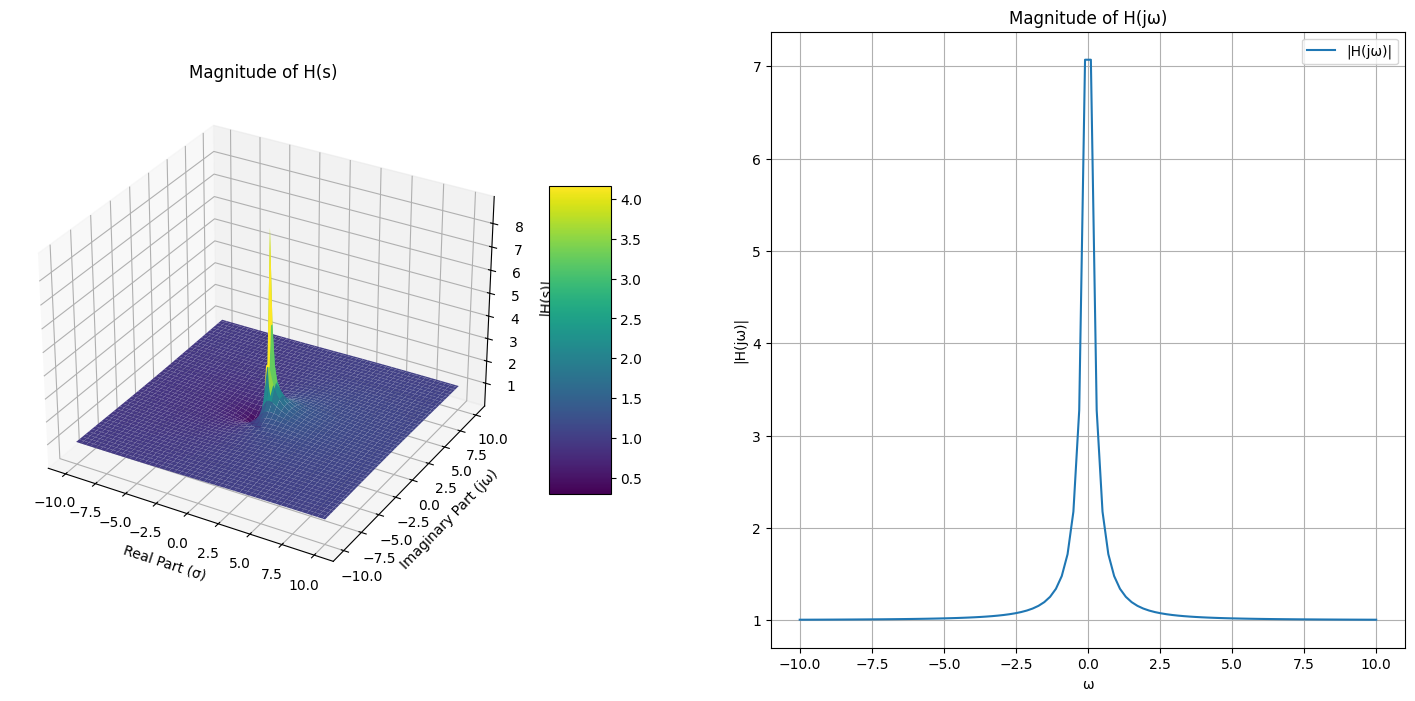

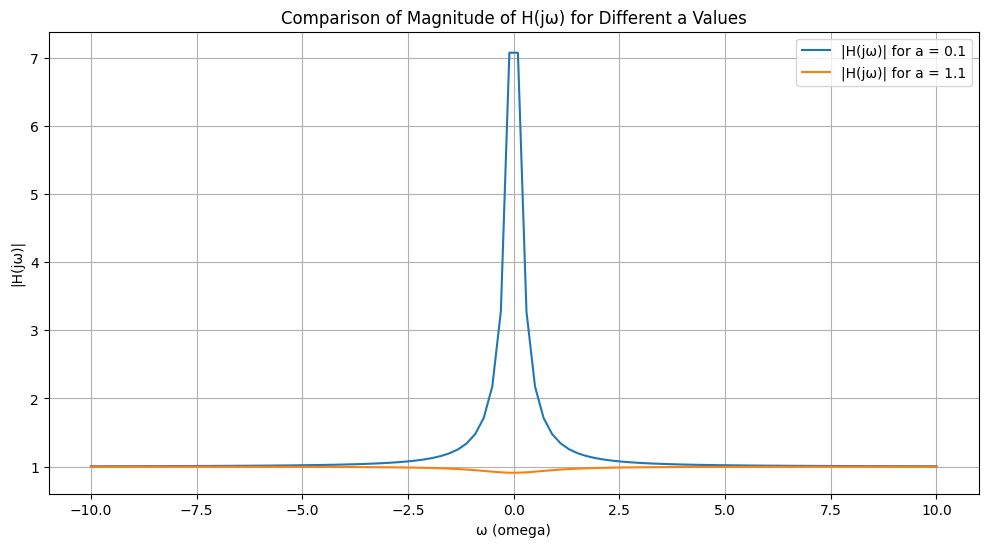

The solution for 'a' such that |H(j0.1)| = 5.0 is: [-0.174355957741627, 0.174355957741627]


In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Constants for the function H(s)
a_value = 0.1

# Defining the s variable for complex numbers
sigma = sp.symbols('sigma', real=True)
omega = sp.symbols('omega', real=True, positive=True)
s = sigma + sp.I*omega


# Transfer function H(s) with given a value
H_s = (s + 1) / (s + a_value)

# Generate a range of values for sigma and omega
sigma_vals = np.linspace(-10, 10, 100)
omega_vals = np.linspace(-10, 10, 100)
Sigma, Omega = np.meshgrid(sigma_vals, omega_vals)

# Evaluate the magnitude and phase of H(s) over the defined range
H_s_mag = np.abs(sp.lambdify((sigma, omega), H_s, 'numpy')(Sigma, Omega))
H_s_phase = np.angle(sp.lambdify((sigma, omega), H_s, 'numpy')(Sigma, Omega))

# Evaluate the magnitude of H(jω) over the omega range
H_jw_mag = np.abs(sp.lambdify(omega, H_s.subs(sigma, 0), 'numpy')(omega_vals))

# Create a 3D plot for the surface of H(s)
fig = plt.figure(figsize=(18, 8))

# Plot the magnitude of H(s)
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(Sigma, Omega, H_s_mag, cmap='viridis', edgecolor='none')
ax1.set_title('Magnitude of H(s)')
ax1.set_xlabel('Real Part (σ)')
ax1.set_ylabel('Imaginary Part (jω)')
ax1.set_zlabel('|H(s)|')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Plot the magnitude of H(jω)
ax2 = fig.add_subplot(122) 
ax2.plot(omega_vals, H_jw_mag, label='|H(jω)|', color='tab:blue')
ax2.set_title('Magnitude of H(jω)')
ax2.set_xlabel('ω')
ax2.set_ylabel('|H(jω)|')
ax2.grid(True)
ax2.legend()

plt.show()

# Part b: What changes when a is 0.1 vs 1.1?

# New value for a for comparison
a_new = 1.1

# New transfer function H(s) with updated a value
H_s_new = (s + 1) / (s + a_new)
H_jw_new_mag = np.abs(sp.lambdify(omega, H_s_new.subs(sigma, 0), 'numpy')(omega_vals))

# Plot the magnitude of H(jω) for both a = 0.1 and a = 1.1
plt.figure(figsize=(12, 6))
plt.plot(omega_vals, H_jw_mag, label=f'|H(jω)| for a = {a_value}', color='tab:blue')
plt.plot(omega_vals, H_jw_new_mag, label=f'|H(jω)| for a = {a_new}', color='tab:orange')
plt.title('Comparison of Magnitude of H(jω) for Different a Values')
plt.xlabel('ω (omega)')
plt.ylabel('|H(jω)|')
plt.grid(True)
plt.legend()
plt.show()

# Part c: Determine the value of a such that H(jw) at w = 0.1 is 5.0
# Solve for a in the equation |H(j0.1)| = 5.0
# Define symbols
Omega = sp.symbols('Omega', real=True)
a = sp.symbols('a', real=True)

desired_omega = 0.1
desired_magnitude = 5.0

# Transfer function H(jOmega) as per given problem
H_jOmega = (sp.I*Omega + 1) / (sp.I*Omega + a)

# Substitute Omega with the desired frequency
H_jOmega_at_desired = H_jOmega.subs(Omega, desired_omega)

# Equation to solve: |H(j0.1)| = 5.0, solved for 'a'
equation = sp.Eq(sp.Abs(H_jOmega_at_desired), desired_magnitude)

# Solve for 'a'
a_solution = sp.solve(equation, a)

# Display the solution for 'a'
print(f"The solution for 'a' such that |H(j0.1)| = 5.0 is: {a_solution}")


### Question 3

Given a Continuous time LTI with the system function

$$ H(s) = \frac{s + 6}{s^2 + 5s + 6} $$

A) Is the above system stable? Why

B) Find the equation representing $ h(t) $, then plot $ h(t) $ to find the min value of $ t $ for $ |h(t)| \leq 0.01 $

C) Driven by the input $ x(t) = \cos (\Omega t)u(t) $, determine the response of the system $ y(t) $
Comment on how the system will treat different $ x(t) $ when $ \Omega $ varies from 0,1,2,3, etc
Tabulate the gain and phase shift when $ \Omega $ varies from 0,1,2,3.
Show that the evaluate magnitude and phase shift agrees with $ H(\Omega) $ calculated.


The system is stable.


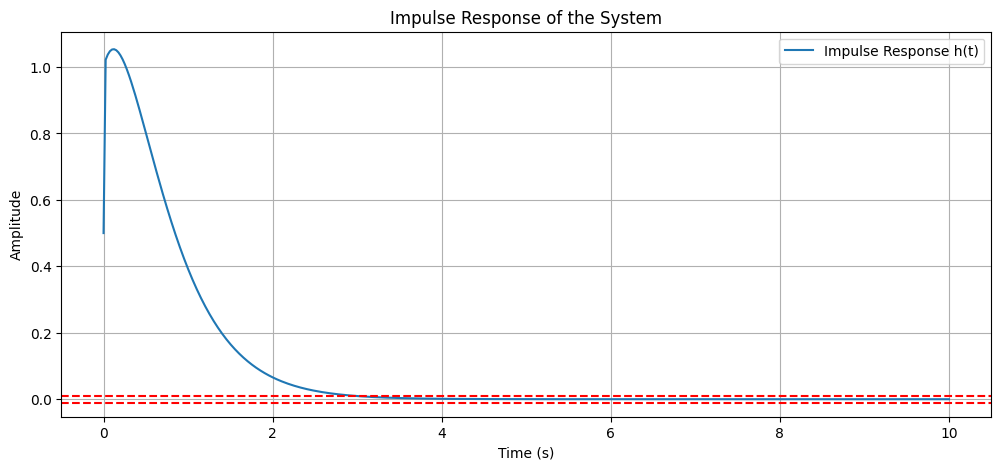

The minimum time for |h(t)| <= 0.01 is approximately: 2.98 seconds


<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in divide
  return ((36 - Omega**2)*cos(Omega*t)/(Omega**4 + 13*Omega**2 + 36) + (Omega**4 + 24*Omega**2)*sin(Omega*t)/(Omega*(Omega**4 + 13*Omega**2 + 36)))*select([less(t, 0),equal(t, 0),True], [0,1/2,1], default=nan) + 9*exp(-t*(3*Omega**2 + 27)/(Omega**2 + 9))*select([less(t, 0),equal(t, 0),True], [0,1/2,1], default=nan)/(Omega**2 + 9) - 8*exp(-t*(2*Omega**2 + 8)/(Omega**2 + 4))*select([less(t, 0),equal(t, 0),True], [0,1/2,1], default=nan)/(Omega**2 + 4)


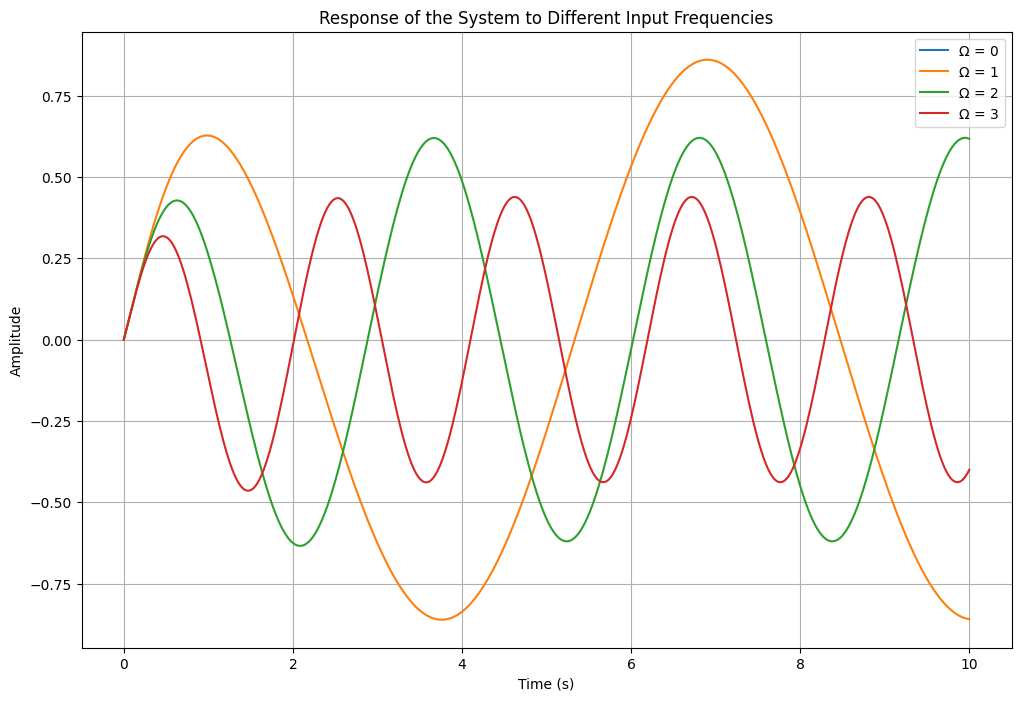

Gain and Phase Shift for Different Values of Omega:
Ω = 0: Gain = 1, Phase Shift = 0
Ω = 1: Gain = sqrt(74)/10, Phase Shift = -atan(5/7)
Ω = 2: Gain = sqrt(65)/13, Phase Shift = -atan(7/4)
Ω = 3: Gain = sqrt(130)/26, Phase Shift = -atan(11/3)
Gain and Phase Shift for Different Values of Omega:
Ω = 0: Gain = 1.00000000000000, Phase Shift = 0
Ω = 1: Gain = 0.860232526704263, Phase Shift = -0.620249485982821
Ω = 2: Gain = 0.620173672946042, Phase Shift = -1.05165021254837
Ω = 3: Gain = 0.438529009653515, Phase Shift = -1.30454427764397


In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


# Define the symbolic variables
s, t = sp.symbols('s t', real=True)

# Define the system function H(s)
H_s = (s + 6) / (s**2 + 5*s + 6)

# Part A: Check stability by inspecting the locations of the poles
# For stability, all poles must have negative real parts.
poles = sp.solve(sp.denom(H_s), s)
stability = all(pole.is_real and pole < 0 for pole in poles)

print(f"The system is{' not' if not stability else ''} stable.")

# Part B: Compute the impulse response h(t) using partial fraction decomposition
# Perform partial fraction decomposition
H_s_apart = sp.apart(H_s, s)
# Since we already know the system is stable, we can directly find the inverse Laplace transform for h(t)
h_t = sp.inverse_laplace_transform(H_s, s, t)
# Simplify the expression for h(t) including the Heaviside step function
h_t = sp.simplify(h_t)

# Lambdify the impulse response for numerical evaluation
h_t_lambdified = sp.lambdify(t, h_t, modules=['numpy'])

# Time vector for plotting
time_vector = np.linspace(0, 10, 400)
# Evaluate h(t)
h_t_values = h_t_lambdified(time_vector)

# Plot the impulse response h(t)
plt.figure(figsize=(12, 5))
plt.plot(time_vector, h_t_values, label='Impulse Response h(t)')
plt.title('Impulse Response of the System')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.axhline(y=0.01, color='r', linestyle='--')
plt.axhline(y=-0.01, color='r', linestyle='--')
plt.legend()
plt.show()

# Find the minimum time where |h(t)| <= 0.01
min_time_threshold = next((time_vector[i] for i, value in enumerate(h_t_values) if abs(value) <= 0.01), None)

print(f"The minimum time for |h(t)| <= 0.01 is approximately: {min_time_threshold:.2f} seconds")


# Part C: Determine the response of the system to the input x(t) = cos(Ωt)u(t)q
# Define the input signal x(t)
Omega = sp.symbols('Omega', real=True, positive=True)
x_t = sp.cos(Omega*t) * sp.Heaviside(t)

# Calculate the Laplace transform of x(t)
X_s = sp.laplace_transform(x_t, t, s, noconds=True)

# Calculate the output Y(s) = H(s)X(s)
Y_s = H_s * X_s

# Calculate the inverse Laplace transform of Y(s) to get y(t)
y_t = sp.inverse_laplace_transform(Y_s, s, t, noconds=True)

# Lambdify the output y(t) for numerical evaluation
y_t_lambdified = sp.lambdify((t, Omega), y_t, modules=['numpy'])

# Time vector for plotting
time_vector = np.linspace(0, 10, 400)

# Evaluate y(t) for different values of Omega
omega_values = [0, 1, 2, 3]
y_t_values = {omega: y_t_lambdified(time_vector, omega) for omega in omega_values}

# Plot the response y(t) for different values of Omega
plt.figure(figsize=(12, 8))
for omega in omega_values:
    plt.plot(time_vector, y_t_values[omega], label=f'Ω = {omega}')
plt.title('Response of the System to Different Input Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the gain and phase shift for different values of Omega
gain_values = {omega: sp.Abs(H_s.subs(s, sp.I*omega)) for omega in omega_values}
phase_shift_values = {omega: sp.arg(H_s.subs(s, sp.I*omega)) for omega in omega_values}

# Display the gain and phase shift for different values of Omega
print("Gain and Phase Shift for Different Values of Omega:")
for omega in omega_values:
    print(f"Ω = {omega}: Gain = {gain_values[omega]}, Phase Shift = {phase_shift_values[omega]}")

# Get the nuerical values 
gain_values = {omega: sp.Abs(H_s.subs(s, sp.I*omega)).evalf() for omega in omega_values}
phase_shift_values = {omega: sp.arg(H_s.subs(s, sp.I*omega)).evalf() for omega in omega_values}

# Display the gain and phase shift for different values of Omega
print("Gain and Phase Shift for Different Values of Omega:")
for omega in omega_values:
    print(f"Ω = {omega}: Gain = {gain_values[omega]}, Phase Shift = {phase_shift_values[omega]}")








### Question 4

**Example 2.6: Differential equation for RLC circuit**

Find a differential equation between the input signal $ x(t) $ and the output signal $ y(t) $ to serve as a mathematical model for the series RLC circuit shown in Fig. 2.11.

**Example 2.14: Natural response of second-order system**

The differential equation for the RLC circuit used in Example 2.6 and shown in Fig. 2.11 was given by Eqn. (2.28). Let the element values be $ R = 5 \Omega $, $ L = 1 H $, and $ C = \frac{1}{6} F $. At time $ t = 0 $, the initial inductor current is $ i(0) = 2 A $ and the initial capacitor voltage is $ y(0) = 1.5 V $. No external input signal is applied to the circuit, therefore $ x(t) = 0 $. Determine the output voltage $ y(t) $.

a) Change $ R $ to be $ 1 \Omega $ with the above initial conditions unchanged. Plot $ y(t) $ and hence find the value of $ y(t) $ at $ t = 0 $, at $ t = 3 $, and at $ t = \infty $.

b) Comment on how lowering $ R $ from $ 5 \Omega $ to $ 1 \Omega $ changes the behavior of the response.

c) Let the system be relax, $ R = 1 \Omega $, $ i(0) = 0 $, $ y(0) = 0 $. Let $ x(t) = 10u(t) $, plot $ y(t) $ and use final value theorem to verify results found in (c). How many seconds did it take for it to converge to 0.99 of the final value?

d) Use final value theorem to verify results found in (c). How many seconds did it take for it to converge to 0.99 of the final value?


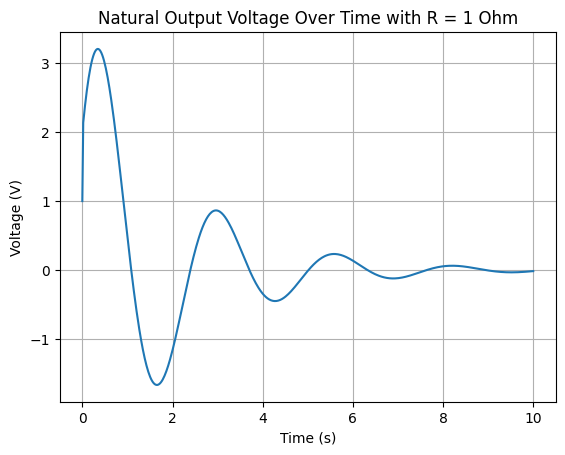

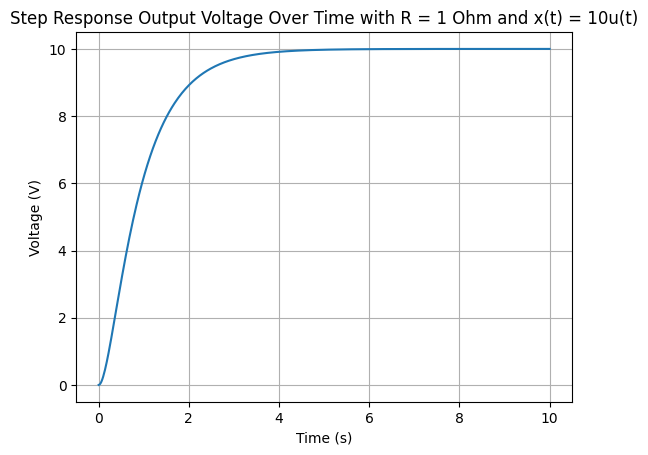

Answer for 4a:
The value of y(t) at t = 0 is: 1.00000000000000
The value of y(t) at t = 3 is: 0.861666376346119
The value of y(t) at t = ∞ is: 0

Answer for 4b:
Lowering the resistance R from 5Ω to 1Ω causes the system to respond more quickly to the initial conditions,
resulting in a faster transient response and a shorter settling time to reach the steady-state.

Answer for 4c:
The final value of y(t) for step response is: 10.0000000000000
The system takes approximately 3.81 seconds to converge to 0.99 of the final value.

Answer for 4d:
The final value of y(t) for step response is: 10.0000000000000
The system takes approximately 3.81 seconds to converge to 0.99 of the final value.


In [5]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbolic variables for time and Laplace domain
t, s = sp.symbols('t s')

# Initial conditions for natural response (no input)
i_0 = 2  # Initial current
v_0 = 1.5  # Initial voltage

# RLC circuit parameters with R = 1 Ohm for natural response
R = 1
L = 1
C = 1/6

# Transfer function for RLC circuit with zero input
A = s**2 + s*(R/L) + 1/(L*C)
Y_s_natural = (i_0*L*s + v_0/C) / A

# Perform inverse Laplace transform to find y(t) for natural response
y_t_natural = sp.inverse_laplace_transform(Y_s_natural, s, t)

# Lambdify for numerical evaluation of natural response
y_t_natural_func = sp.lambdify(t, y_t_natural, modules=['numpy'])

# Generate time points for evaluating the function for natural response
time_points_natural = np.linspace(0, 10, 500)
y_t_vals_natural = y_t_natural_func(time_points_natural)

# Plot y(t) for natural response
plt.plot(time_points_natural, y_t_vals_natural)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Natural Output Voltage Over Time with R = 1 Ohm')
plt.grid(True)
plt.show()

# For step response with input
R = 1  # Resistance in ohms for step response
L = 1  # Inductance in henries
C = 1/6  # Capacitance in farads
i_0 = 0  # Initial inductor current for step response
v_0 = 0  # Initial capacitor voltage for step response
V_in = 10  # Step input magnitude

# Define the input signal x(t)
x_t = V_in * sp.Heaviside(t)

# Calculate the Laplace transform of x(t)
X_s = sp.laplace_transform(x_t, t, s, noconds=True)

# Calculate the output Y(s) for step response
Y_s_step = (X_s / (L*C*s**2 + R/L*s + 1)).simplify()

# Perform inverse Laplace transform to find y(t) for step response
y_t_step = sp.inverse_laplace_transform(Y_s_step, s, t).simplify()

# Lambdify for numerical evaluation of step response
y_t_step_func = sp.lambdify(t, y_t_step, modules=['numpy'])

# Generate time points for evaluating the function for step response
time_points_step = np.linspace(0, 10, 500)
y_t_vals_step = y_t_step_func(time_points_step)

# Plot y(t) for step response
plt.plot(time_points_step, y_t_vals_step)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Step Response Output Voltage Over Time with R = 1 Ohm and x(t) = 10u(t)')
plt.grid(True)
plt.show()

# Use final value theorem to find the steady state value for step response
y_final_step = sp.limit(s*Y_s_step, s, 0)

# Calculate the time it takes to converge to 0.99 of the final value
y_99 = 0.99 * y_final_step
time_to_99 = next(t for t, v in zip(time_points_step, y_t_vals_step) if sp.Abs(v - y_99) < 0.01)


# organize and print answers for the questions
# Question 4 - Summary of Answers

# Answer 4a: The natural response of the system with R = 1 Ohm
print("Answer for 4a:")
print(f"The value of y(t) at t = 0 is: {y_t_natural.subs(t, 0).evalf()}")
print(f"The value of y(t) at t = 3 is: {y_t_natural.subs(t, 3).evalf()}")
print(f"The value of y(t) at t = ∞ is: {sp.limit(y_t_natural, t, sp.oo).evalf()}")

# Answer 4b: Lowering R from 5Ω to 1Ω
print("\nAnswer for 4b:")
print("Lowering the resistance R from 5Ω to 1Ω causes the system to respond more quickly to the initial conditions,")
print("resulting in a faster transient response and a shorter settling time to reach the steady-state.")

# Answer 4c: Step response of the system for R = 1 Ohm, i(0) = 0, y(0) = 0 and x(t) = 10u(t)
print("\nAnswer for 4c:")
print(f"The final value of y(t) for step response is: {y_final_step.evalf()}")
print(f"The system takes approximately {time_to_99:.2f} seconds to converge to 0.99 of the final value.")

# Answer 4d: Verification using the final value theorem and time to converge
print("\nAnswer for 4d:")
print(f"The final value of y(t) for step response is: {y_final_step.evalf()}")
print(f"The system takes approximately {time_to_99:.2f} seconds to converge to 0.99 of the final value.")

